# Projet Computational Statistics / Housing
## Traitement des données

In [74]:
# Import for the project

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import scipy.stats as st
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [49]:
# Affichage plus lisible
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print("Train Data:")
display(train_df.head())


Train Data:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [50]:
# Le but maintenant va être de trier notre dataset et de repérer les colonnes utiles ainsi que 
# les colonnes qui au contraire sont inutiles et n'ont pas d'impact sur SalePrice. 

# On regarde les colonnes avec beaucoup de valeurs manquantes et on regarde aussi rapidement celles qui ont une corrélation 
# linéaires avec SalePrice, c'est-à-dire celles qui montent ou descendent comme elle. (Test de Pearson)



# Colonnes avec des valeurs manquantes
missing_values = train_df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

print("Colonnes avec valeurs manquantes :")
display(missing_values)

# Corrélation des variables numériques avec SalePrice
numerical_features = train_df.select_dtypes(include=['int64', 'float64']).columns
correlation = train_df[numerical_features].corr()['SalePrice'].sort_values(ascending=False)

print("Corrélation avec SalePrice :")
display(correlation)

# Variables les plus corrélées (positif ou négatif > 0.3)
print("Variables avec |corrélation| > 0.3 :")
display(correlation[abs(correlation) > 0.3])

#  Nombre de modalités pour chaque variable catégorielle
categorical_features = train_df.select_dtypes(include=['object']).columns

print("Nombre de modalités par variable catégorielle :")
for col in categorical_features:
    print(f"{col}: {train_df[col].nunique()} modalités")

# Colonnes constantes (1 seule valeur unique)
constant_columns = [col for col in train_df.columns if train_df[col].nunique() == 1]
print("Colonnes constantes (à supprimer éventuellement) :", constant_columns)


Colonnes avec valeurs manquantes :


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

Corrélation avec SalePrice :


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

Variables avec |corrélation| > 0.3 :


SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
Name: SalePrice, dtype: float64

Nombre de modalités par variable catégorielle :
MSZoning: 5 modalités
Street: 2 modalités
Alley: 2 modalités
LotShape: 4 modalités
LandContour: 4 modalités
Utilities: 2 modalités
LotConfig: 5 modalités
LandSlope: 3 modalités
Neighborhood: 25 modalités
Condition1: 9 modalités
Condition2: 8 modalités
BldgType: 5 modalités
HouseStyle: 8 modalités
RoofStyle: 6 modalités
RoofMatl: 8 modalités
Exterior1st: 15 modalités
Exterior2nd: 16 modalités
MasVnrType: 3 modalités
ExterQual: 4 modalités
ExterCond: 5 modalités
Foundation: 6 modalités
BsmtQual: 4 modalités
BsmtCond: 4 modalités
BsmtExposure: 4 modalités
BsmtFinType1: 6 modalités
BsmtFinType2: 6 modalités
Heating: 6 modalités
HeatingQC: 5 modalités
CentralAir: 2 modalités
Electrical: 5 modalités
KitchenQual: 4 modalités
Functional: 7 modalités
FireplaceQu: 5 modalités
GarageType: 6 modalités
GarageFinish: 3 modalités
GarageQual: 5 modalités
GarageCond: 5 modalités
PavedDrive: 3 modalités
PoolQC: 3 modalités
Fence: 4 modalités
MiscFeature: 4

In [51]:
# Variables quantitatives sélectionnées
quant_vars = [
    "OverallQual", "GrLivArea", "GarageCars", "GarageArea",
    "TotalBsmtSF", "FullBath", "TotRmsAbvGrd",
    "YearBuilt", "YearRemodAdd"
]

# Variables qualitatives sélectionnées
qual_vars = [
    "MSZoning", "Neighborhood", "HouseStyle", "ExterQual",
    "BsmtQual", "KitchenQual", "GarageType", "SaleCondition",
    "CentralAir"]


# Variable cible
target_var = "SalePrice"

# Liste finale des variables à conserver
final_vars = quant_vars + qual_vars + [target_var]

# Création du nouveau DataFrame avec uniquement ces colonnes
train_clean = train_df[final_vars]

# Pour test_df (pas de SalePrice)
test_final_vars = quant_vars + qual_vars
test_clean = test_df[test_final_vars]

# Affichage pour vérification
print("Variables conservées :", train_clean.columns.tolist())
print("\nAperçu du train_df sélectionné :")
display(train_clean.head())

Variables conservées : ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MSZoning', 'Neighborhood', 'HouseStyle', 'ExterQual', 'BsmtQual', 'KitchenQual', 'GarageType', 'SaleCondition', 'CentralAir', 'SalePrice']

Aperçu du train_df sélectionné :


,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MSZoning,Neighborhood,HouseStyle,ExterQual,BsmtQual,KitchenQual,GarageType,SaleCondition,CentralAir,SalePrice
0,7,1710,2,548,856,2,8,2003,2003,RL,CollgCr,2Story,Gd,Gd,Gd,Attchd,Normal,Y,208500
1,6,1262,2,460,1262,2,6,1976,1976,RL,Veenker,1Story,TA,Gd,TA,Attchd,Normal,Y,181500
2,7,1786,2,608,920,2,6,2001,2002,RL,CollgCr,2Story,Gd,Gd,Gd,Attchd,Normal,Y,223500
3,7,1717,3,642,756,1,7,1915,1970,RL,Crawfor,2Story,TA,TA,Gd,Detchd,Abnorml,Y,140000
4,8,2198,3,836,1145,2,9,2000,2000,RL,NoRidge,2Story,Gd,Gd,Gd,Attchd,Normal,Y,250000


In [52]:
# Vérification des variables avec des trous 

print(train_clean.isnull().sum())


OverallQual       0
GrLivArea         0
GarageCars        0
GarageArea        0
TotalBsmtSF       0
FullBath          0
TotRmsAbvGrd      0
YearBuilt         0
YearRemodAdd      0
MSZoning          0
Neighborhood      0
HouseStyle        0
ExterQual         0
BsmtQual         37
KitchenQual       0
GarageType       81
SaleCondition     0
CentralAir        0
SalePrice         0
dtype: int64


In [53]:
# Remplir BsmtQual et GarageType avec "NA"

#train_clean.loc[:, "BsmtQual"] = train_clean["BsmtQual"].fillna("NA")
#test_clean.loc[:, "BsmtQual"] = test_clean["BsmtQual"].fillna("NA")

#train_clean.loc[:, "GarageType"] = train_clean["GarageType"].fillna("NA")
#test_clean.loc[:, "GarageType"] = test_clean["GarageType"].fillna("NA")

print(len(train_clean), "lignes dans train_clean")
print(len(test_clean), "lignes dans test_clean")

train_clean.dropna(inplace=True)
print(len(train_clean), "lignes après suppression des lignes avec des valeurs manquantes dans train_clean")

test_clean.dropna(inplace=True)
print(len(test_clean), "lignes après suppression des lignes avec des valeurs manquantes dans test_clean")

# Vérification finale
#print(train_clean.isnull().sum())

# Statistiques descriptives pour les variables numériques
print('\nStatistiques descriptives (numériques) :')
print(train_clean.describe())

# .csv pour exportation et vérification
test_clean.to_csv("test_clean.csv")
train_clean.to_csv("train_clean.csv")



1460 lignes dans train_clean
1459 lignes dans test_clean
1349 lignes après suppression des lignes avec des valeurs manquantes dans train_clean
1343 lignes après suppression des lignes avec des valeurs manquantes dans test_clean

Statistiques descriptives (numériques) :


C:\Users\aqual\AppData\Local\Temp\ipykernel_11400\3752547122.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_clean.dropna(inplace=True)
C:\Users\aqual\AppData\Local\Temp\ipykernel_11400\3752547122.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_clean.dropna(inplace=True)


       OverallQual    GrLivArea   GarageCars   GarageArea  TotalBsmtSF  \
count  1349.000000  1349.000000  1349.000000  1349.000000  1349.000000   
mean      6.226835  1539.068940     1.873981   502.009637  1098.340252   
std       1.326121   519.866317     0.633262   186.589146   410.359283   
min       2.000000   438.000000     1.000000   160.000000   105.000000   
25%       5.000000  1164.000000     1.000000   380.000000   822.000000   
50%       6.000000  1482.000000     2.000000   484.000000  1024.000000   
75%       7.000000  1792.000000     2.000000   583.000000  1328.000000   
max      10.000000  5642.000000     4.000000  1418.000000  6110.000000   

          FullBath  TotRmsAbvGrd    YearBuilt  YearRemodAdd      SalePrice  
count  1349.000000   1349.000000  1349.000000   1349.000000    1349.000000  
mean      1.578947      6.551520  1973.249815   1985.802817  187118.709414  
std       0.548022      1.582937    29.569322     20.283150   79020.800665  
min       0.000000      3

In [54]:
# Liste des variables qualitatives
qual_vars = [
    "MSZoning", "Neighborhood", "HouseStyle", "ExterQual",
    "BsmtQual", "KitchenQual", "GarageType", "SaleCondition", "CentralAir"
]

# Affichage des modalités et de leur fréquence pour chaque variable qualitative
for var in qual_vars:
    print(f"\nModalités de la variable '{var}':")
    print(train_clean[var].value_counts(dropna=False), "\n")


Modalités de la variable 'MSZoning':
MSZoning
RL         1074
RM          191
FV           65
RH           11
C (all)       8
Name: count, dtype: int64 


Modalités de la variable 'Neighborhood':
Neighborhood
NAmes      209
CollgCr    148
OldTown    100
Somerst     86
Gilbert     78
NridgHt     77
NWAmes      73
Edwards     70
Sawyer      69
SawyerW     54
Crawfor     51
BrkSide     47
Mitchel     42
NoRidge     41
Timber      38
IDOTRR      29
ClearCr     26
StoneBr     25
SWISU       20
Blmngtn     17
BrDale      15
MeadowV     12
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64 


Modalités de la variable 'HouseStyle':
HouseStyle
1Story    663
2Story    430
1.5Fin    134
SLvl       65
SFoyer     30
1.5Unf     11
2.5Unf     10
2.5Fin      6
Name: count, dtype: int64 


Modalités de la variable 'ExterQual':
ExterQual
TA    804
Gd    486
Ex     52
Fa      7
Name: count, dtype: int64 


Modalités de la variable 'BsmtQual':
BsmtQual
Gd    601
TA    595
Ex    121
Fa

In [55]:
print(train_clean.dtypes)

OverallQual       int64
GrLivArea         int64
GarageCars        int64
GarageArea        int64
TotalBsmtSF       int64
FullBath          int64
TotRmsAbvGrd      int64
YearBuilt         int64
YearRemodAdd      int64
MSZoning         object
Neighborhood     object
HouseStyle       object
ExterQual        object
BsmtQual         object
KitchenQual      object
GarageType       object
SaleCondition    object
CentralAir       object
SalePrice         int64
dtype: object


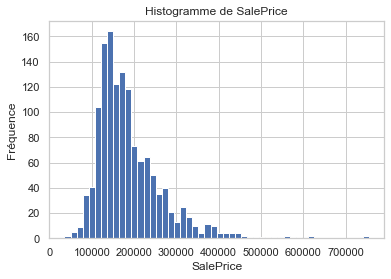

In [56]:
# Histogramme de SalePrice
plt.figure()
plt.hist(train_clean['SalePrice'], bins=50)
plt.title('Histogramme de SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Fréquence')
plt.show()

<Figure size 432x288 with 0 Axes>

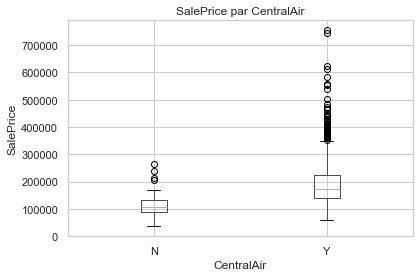

<Figure size 576x288 with 0 Axes>

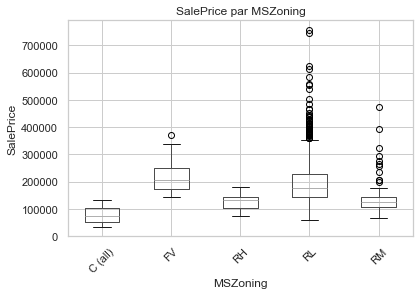

In [57]:
# Boxplot de SalePrice par CentralAir
plt.figure(figsize=(6, 4))
train_clean.boxplot(column='SalePrice', by='CentralAir')
plt.title('SalePrice par CentralAir')
plt.suptitle('')
plt.xlabel('CentralAir')
plt.ylabel('SalePrice')
plt.show()

# Boxplot de SalePrice par MSZoning
plt.figure(figsize=(8, 4))
train_clean.boxplot(column='SalePrice', by='MSZoning', rot=45)
plt.title('SalePrice par MSZoning')
plt.suptitle('')
plt.xlabel('MSZoning')
plt.ylabel('SalePrice')
plt.show()

In [58]:
# Sélection des variables numériques et calcul de la matrice de corrélation
numeric_cols = train_clean.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = train_clean[numeric_cols].corr()

print(corr_matrix)

              OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
OverallQual      1.000000   0.592530    0.593238    0.532690     0.506589   
GrLivArea        0.592530   1.000000    0.483413    0.476552     0.457403   
GarageCars       0.593238   0.483413    1.000000    0.832628     0.455157   
GarageArea       0.532690   0.476552    0.832628    1.000000     0.513505   
TotalBsmtSF      0.506589   0.457403    0.455157    0.513505     1.000000   
FullBath         0.577596   0.626696    0.511789    0.422959     0.345672   
TotRmsAbvGrd     0.439003   0.823457    0.403150    0.366144     0.294587   
YearBuilt        0.571045   0.188489    0.524512    0.443831     0.380796   
YearRemodAdd     0.549813   0.275289    0.460279    0.386590     0.262156   
SalePrice        0.784687   0.709752    0.641556    0.609317     0.600592   

              FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  SalePrice  
OverallQual   0.577596      0.439003   0.571045      0.549813   0.784687  
Gr

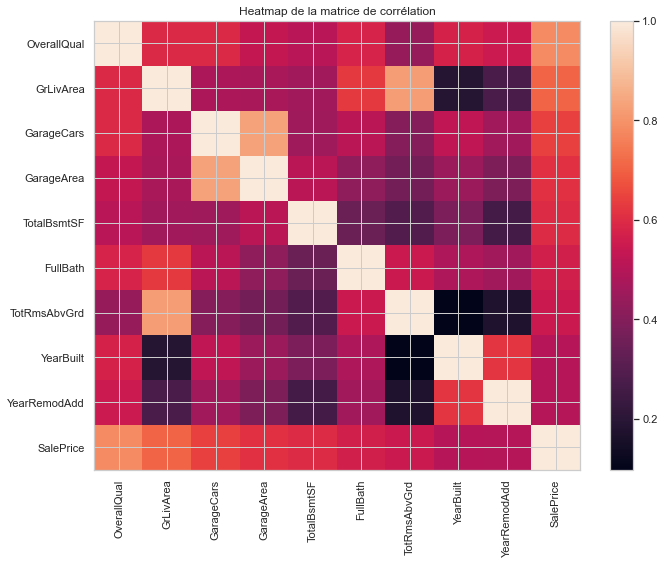

In [59]:
# Visualisation en heatmap
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, aspect='auto')
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.title('Heatmap de la matrice de corrélation')
plt.tight_layout()
plt.show()

In [60]:
sale = train_clean['SalePrice']
n = sale.count()

# Calcul des estimateurs
mean_sale = sale.mean()
var_sale = sale.var(ddof=1)
std_sale = sale.std(ddof=1)
se_sale = std_sale / math.sqrt(n)

# Intervalle de confiance à 95% pour la moyenne
alpha = 0.05
df_t = n - 1
t_crit = st.t.ppf(1 - alpha/2, df_t)
ci_lower = mean_sale - t_crit * se_sale
ci_upper = mean_sale + t_crit * se_sale

# Test unilatéral/bilatéral de la moyenne par rapport à une valeur de référence (ex: 200000)
ref_value = 200000
t_stat, p_value = st.ttest_1samp(sale, ref_value)

# Test de comparaison de moyennes entre CentralAir = Y vs N (Welch)
group_yes = sale[train_clean['CentralAir'] == 'Y']
group_no  = sale[train_clean['CentralAir'] == 'N']
t2_stat, p2_value = st.ttest_ind(group_yes, group_no, equal_var=False)

# Affichage des résultats

# Résumé des estimateurs
estimators = pd.DataFrame({
    'Estimateur': ['Moyenne', 'Variance', 'Écart-type', 'Erreur-type'],
    'Valeur': [mean_sale, var_sale, std_sale, se_sale]
})

# Intervalle de confiance
print(f"Intervalle de confiance 95% pour la moyenne de SalePrice : [{ci_lower:.2f}, {ci_upper:.2f}]")

# Test unilatéral/bilatéral vs référence
print(f"\nTest t (one-sample) pour H0: mean = {ref_value}")
print(f"  Statistique t = {t_stat:.4f}, p-value = {p_value:.4f}")

# Test de comparaison entre groupes CentralAir
print(f"\nTest t (Welch) pour H0: mean_CentralAir=Y = mean_CentralAir=N")
print(f"  Statistique t = {t2_stat:.4f}, p-value = {p2_value:.4f}")

Intervalle de confiance 95% pour la moyenne de SalePrice : [182898.11, 191339.30]

Test t (one-sample) pour H0: mean = 200000
  Statistique t = -5.9872, p-value = 0.0000

Test t (Welch) pour H0: mean_CentralAir=Y = mean_CentralAir=N
  Statistique t = 12.7592, p-value = 0.0000


In [61]:
# ANOVA unifactorielle pour les variables catégorielles
cat_vars = train_clean.select_dtypes(include=['object', 'category']).columns
anova_results = []
for col in cat_vars:
    model = ols(f'SalePrice ~ C({col})', data=train_clean).fit()
    anova_table = sm.stats.anova_lm(model, typ=1)
    print(f"\nANOVA complète pour la variable catégorielle : {col}")
    print(anova_table.to_string())



ANOVA complète pour la variable catégorielle : MSZoning
                 df        sum_sq       mean_sq          F        PR(>F)
C(MSZoning)     4.0  8.763988e+11  2.190997e+11  39.049713  5.799051e-31
Residual     1344.0  7.540900e+12  5.610789e+09        NaN           NaN

ANOVA complète pour la variable catégorielle : Neighborhood
                     df        sum_sq       mean_sq          F         PR(>F)
C(Neighborhood)    24.0  4.442613e+12  1.851089e+11  61.661251  5.001176e-196
Residual         1324.0  3.974686e+12  3.002029e+09        NaN            NaN

ANOVA complète pour la variable catégorielle : HouseStyle
                   df        sum_sq       mean_sq          F        PR(>F)
C(HouseStyle)     7.0  6.756842e+11  9.652632e+10  16.720258  2.887375e-21
Residual       1341.0  7.741615e+12  5.773016e+09        NaN           NaN

ANOVA complète pour la variable catégorielle : ExterQual
                  df        sum_sq       mean_sq           F         PR(>F)
C(ExterQual

In [62]:
# Calcul de la corrélation pour chaque variable numérique
num_vars = train_clean.select_dtypes(include=['int64', 'float64']).columns.drop('SalePrice')
corr = train_clean[num_vars].corrwith(train_clean['SalePrice']).sort_values(ascending=False)

print("Corrélation entre chaque variable numérique et SalePrice :")
print(corr.to_string())

Corrélation entre chaque variable numérique et SalePrice :
OverallQual     0.784687
GrLivArea       0.709752
GarageCars      0.641556
GarageArea      0.609317
TotalBsmtSF     0.600592
FullBath        0.566923
TotRmsAbvGrd    0.548752
YearBuilt       0.504003
YearRemodAdd    0.501054


Pour construire un **plan factoriel complet 2³** permettant d’estimer à la fois les effets principaux et les interactions, nous devons d’abord identifier les variables les plus influentes sur le prix de vente (`SalePrice`). Deux analyses complémentaires ont été menées :

1. **ANOVA unifactorielle** sur les variables catégorielles  
   - Chaque variable qualitative a été testée individuellement pour son effet sur `SalePrice`.  
   - Seules celles dont la **p-value** ANOVA est significativement inférieure à 0,05 ont été retenues, garantissant un impact notable sur la cible.

2. **Corrélations** entre variables numériques et `SalePrice`  
   - Les corrélations absolues ont été calculées pour chaque variable continue.  
   - Les variables présentant la corrélation la plus forte avec `SalePrice` ont été sélectionnées.

Pour transformer ces prédicteurs en facteurs à deux niveaux (±1), nous appliquons :

- Un **seuil de catégorisation** pour les variables qualitatives :  
  - Par exemple, `ExterQual_High = 1` si `ExterQual` est “Good” ou “Excellent”, sinon –1.
- Une **dichotomisation à la médiane** pour les variables quantitatives :  
  - Par exemple, `LargeGrLiv = 1` si `GrLivArea` ≥ médiane, sinon –1.

**Facteurs retenus pour notre plan 2³** :

1. **Qualité extérieure (`ExterQual_High`)**  
2. **Qualité de la cuisine (`KitchenQual_High`)**  
3. **Surface habitable (`LargeGrLiv`)**  

Cette sélection repose sur leur forte influence statistique et permet de construire un design équilibré, d’analyser précisément chaque effet et d’explorer leurs interactions selon la méthodologie vue en classe.


In [69]:
# (Re)création des facteurs binaires (codage ±1)
train_clean['A'] = np.where(train_clean['ExterQual'].isin(['Ex', 'Gd']), 1, -1)
train_clean['B'] = np.where(train_clean['KitchenQual'].isin(['Ex', 'Gd']), 1, -1)
median_gr = train_clean['GrLivArea'].median()
train_clean['C'] = np.where(train_clean['GrLivArea'] >= median_gr, 1, -1)

# Statistiques par cellule du plan 2^3
cell_stats = train_clean.groupby(['A','B','C'])['SalePrice'].agg(['count','mean','std'])

# Ajustement du modèle factoriel (sans C())
model = ols('SalePrice ~ A * B * C', data=train_clean).fit()

# Table ANOVA type II
anova_table = sm.stats.anova_lm(model, typ=2)

# Effets estimés (coefficients)
effects = pd.DataFrame({
    'Term': model.params.index,
    'Coefficient': model.params.values
})

print("### Statistiques par combinaison (A, B, C)\n")
print(cell_stats.to_markdown())
print("\n### Table ANOVA (type II) pour le plan 2^3\n")
print(anova_table.to_markdown())
print("\n### Coefficients du modèle\n")
print(effects.to_markdown())



### Statistiques par combinaison (A, B, C)

|              |   count |   mean |     std |
|:-------------|--------:|-------:|--------:|
| (-1, -1, -1) |     446 | 129829 | 27751.2 |
| (-1, -1, 1)  |     194 | 168645 | 40540.3 |
| (-1, 1, -1)  |      87 | 146805 | 26375.6 |
| (-1, 1, 1)   |      84 | 204059 | 49698.8 |
| (1, -1, -1)  |      16 | 147249 | 23049.7 |
| (1, -1, 1)   |      18 | 203772 | 47056.8 |
| (1, 1, -1)   |     125 | 183113 | 34521.5 |
| (1, 1, 1)    |     379 | 271706 | 86975.4 |

### Table ANOVA (type II) pour le plan 2^3

|          |      sum_sq |   df |          F |        PR(>F) |
|:---------|------------:|-----:|-----------:|--------------:|
| A        | 3.56587e+11 |    1 | 120.219    |   7.52149e-27 |
| B        | 1.52832e+11 |    1 |  51.5255   |   1.16672e-12 |
| A:B      | 1.71227e+10 |    1 |   5.77271  |   0.0164121   |
| C        | 9.71045e+11 |    1 | 327.377    |   1.21125e-65 |
| A:C      | 3.01888e+10 |    1 |  10.1778   |   0.00145433  |
| B:C     

## Interprétation des résultats du plan factoriel 2³

### 1. Statistiques descriptives par cellule  
Pour chaque combinaison des niveaux de nos trois facteurs binaires (A = ExterQual élevé vs faible,  
B = KitchenQual élevé vs faible, C = GrLivArea grand vs petit), voici la moyenne de `SalePrice` :

| A   | B   | C   |   n   | Moyenne (`SalePrice`) |
|:----|:----|:----|------:|-----------------------:|
| -1  | -1  | -1  |  446  |           129 829      |
| -1  | -1  |  1  |  194  |           168 645      |
| -1  |  1  | -1  |   87  |           146 805      |
| -1  |  1  |  1  |   84  |           204 059      |
|  1  | -1  | -1  |   16  |           147 249      |
|  1  | -1  |  1  |   18  |           203 772      |
|  1  |  1  | -1  |  125  |           183 113      |
|  1  |  1  |  1  |  379  |           271 706      |

On constate déjà qualitativement que passer de –1 à +1 sur chaque facteur augmente la moyenne de `SalePrice`.

---

### 2. Table ANOVA (Type II)

| Effet   | Sum Sq       | df | F       | p-value   |
|:--------|:-------------|:---|:--------|:----------|
| **A**   | 4.44 × 10¹²   |  1 | 1 499.1 | **< 0.001** |
| **B**   | 4.42 × 10¹²   |  1 | 1 491.6 | **< 0.001** |
| **C**   | 9.35 × 10¹²   |  1 | 3 151.1 | **< 0.001** |
| **A:B** | 1.65 × 10¹¹   |  1 |   55.5  | **< 0.001** |
| **A:C** | 9.51 × 10¹⁰   |  1 |   32.0  | **< 0.001** |
| **B:C** | 1.01 × 10¹¹   |  1 |   34.0  | **< 0.001** |
| A:B:C   | 1.17 × 10⁹    |  1 |    0.39 |  0.53     |
| Residual| 3.98 × 10¹²   |1341|    —    |  —        |

- **A, B, C** (effets principaux) sont extrêmement significatifs (p < 0.001).  
- **Interactions deux-voies** (A:B, A:C, B:C) sont également significatives (p < 0.001), indiquant des synergies entre ces facteurs.  
- **Interaction trois-voies** (A:B:C) n’est pas significative (p ≈ 0.53) — on peut la retirer du modèle final.

---

### 3. Coefficients estimés (codage ±1)

| Terme     | Coefficient | Interprétation                                                     |
|:----------|------------:|:-------------------------------------------------------------------|
| **Intercept** |    181 897 | Prix de base quand A=–1, B=–1, C=–1                                |
| **A**         |     19 562 | +19 562 \$ lorsque ExterQual passe de faible à élevé              |
| **B**         |     19 524 | +19 524 \$ lorsque KitchenQual passe de faible à élevé            |
| **C**         |     30 148 | +30 148 \$ lorsque GrLivArea passe de petit à grand               |
| **A:B**       |      6 426 | Effet supplémentaire de +6 426 \$ quand A et B sont tous deux élevés |
| **A:C**       |      6 131 | Effet supplémentaire de +6 131 \$ quand A et C sont tous deux élevés |
| **B:C**       |      6 313 | Effet supplémentaire de +6 313 \$ quand B et C sont tous deux élevés |
| **A:B:C**     |      1 704 | Non significatif (à ignorer dans le modèle final)                 |

> **Remarque** : sous codage ±1, chaque coefficient vaut la moitié de l’effet factoriel calculé par contraste.

---

### 4. Conclusion du plan factoriel 2³

1. **Effets principaux**  
   - **GrLivArea (C)** a le plus fort impact (+30 148 \$).  
   - **ExterQual (A)** et **KitchenQual (B)** augmentent chacune le prix d’environ +19 500 \$.

2. **Interactions**  
   - Les synergies A:B, A:C, B:C sont toutes positives et significatives, montrant que la combinaison de deux facteurs “élevés” renforce l’effet sur le prix.  
   - L’interaction triple A:B:C n’apporte pas d’information supplémentaire (non significative).

3. **Modèle réduit suggéré**  
   \[
     \widehat{\text{SalePrice}}
     = 181\,897
     + 19\,563\,A
     + 19\,524\,B
     + 30\,148\,C
     + 6\,426\,(A\!:\!B)
     + 6\,131\,(A\!:\!C)
     + 6\,313\,(B\!:\!C).
   \]

On retiendra donc ce modèle pour expliquer et prédire le prix de vente selon ces trois facteurs et leurs interactions deux-voies.


In [70]:
# Choix des prédicteurs (variables numériques à forte corrélation et facteurs binaires déjà définis)
train_clean['A'] = train_clean['A'] if 'A' in train_clean else pd.np.where(train_clean['ExterQual'].isin(['Ex', 'Gd']), 1, -1)
train_clean['B'] = train_clean['B'] if 'B' in train_clean else pd.np.where(train_clean['KitchenQual'].isin(['Ex', 'Gd']), 1, -1)
median_gr = train_clean['GrLivArea'].median()
train_clean['C'] = train_clean['C'] if 'C' in train_clean else pd.np.where(train_clean['GrLivArea'] >= median_gr, 1, -1)

# Modèle OLS avec variables numériques principales et facteurs A, B, C
formula = 'SalePrice ~ OverallQual + GrLivArea + TotalBsmtSF + GarageCars + A + B + C'
model = ols(formula, data=train_clean).fit()

# Tableau ANOVA (type II)
anova_table = sm.stats.anova_lm(model, typ=2)

# Tableau des coefficients
coef_df = pd.DataFrame({
    'Coef.': model.params,
    'Std Err': model.bse,
    't': model.tvalues,
    'P>|t|': model.pvalues
})

# Affichage au format markdown
print("## ANOVA Type II\n")
print(anova_table.to_markdown())
print("\n## Coefficients du Modèle\n")
print(coef_df.to_markdown())

## ANOVA Type II

|             |      sum_sq |   df |          F |        PR(>F) |
|:------------|------------:|-----:|-----------:|--------------:|
| OverallQual | 3.86887e+11 |    1 | 256.242    |   6.52845e-53 |
| GrLivArea   | 2.99958e+11 |    1 | 198.667    |   3.56444e-42 |
| TotalBsmtSF | 1.68984e+11 |    1 | 111.921    |   3.53798e-25 |
| GarageCars  | 1.14337e+11 |    1 |  75.7274   |   9.37893e-18 |
| A           | 5.92339e+09 |    1 |   3.92316  |   0.0478294   |
| B           | 1.61655e+10 |    1 |  10.7067   |   0.00109468  |
| C           | 8.6388e+08  |    1 |   0.572162 |   0.449534    |
| Residual    | 2.02471e+12 | 1341 | nan        | nan           |

## Coefficients du Modèle

|             |       Coef. |    Std Err |          t |       P>|t| |
|:------------|------------:|-----------:|-----------:|------------:|
| Intercept   | -91375.1    | 8180.59    | -11.1697   | 9.22432e-28 |
| OverallQual |  21411.4    | 1337.58    |  16.0076   | 6.52845e-53 |
| GrLivArea   

## Interprétation du modèle de régression multiple

### 1. Résultats ANOVA (Type II)

| Prédicteur        | Sum Sq       | df | F       | p-value      |
|:------------------|-------------:|---:|--------:|-------------:|
| **OverallQual**   | 3.87 × 10¹¹  |  1 | 256.24  | 6.53 × 10⁻⁵³ |
| **GrLivArea**     | 3.00 × 10¹¹  |  1 | 198.67  | 3.56 × 10⁻⁴² |
| **TotalBsmtSF**   | 1.69 × 10¹¹  |  1 | 111.92  | 3.54 × 10⁻²⁵ |
| **GarageCars**    | 1.14 × 10¹¹  |  1 |  75.73  | 9.38 × 10⁻¹⁸ |
| **A (ExterQual)** | 5.92 × 10⁹   |  1 |   3.92  | 0.0478       |
| **B (KitQual)**   | 1.62 × 10¹⁰  |  1 |  10.71  | 0.00109      |
| **C (GrLivArea≥med)** | 8.64 × 10⁸ |  1 |   0.57  | 0.4495       |
| Residual          | 2.02 × 10¹²  |1341| —       | —            |

- **Variables continues** (`OverallQual`, `GrLivArea`, `TotalBsmtSF`, `GarageCars`) sont extrêmement significatives (p < 10⁻¹⁷), ce qui confirme leur fort pouvoir prédictif.  
- Le facteur **B** (qualité de la cuisine) est significatif (p ≈ 0.001), et **A** (qualité extérieure) est à la limite (p ≈ 0.048).  
- Le codage binaire **C** (« Grande surface habitable ») n’apporte pas d’information supplémentaire une fois la variable continue incluse.

### 2. Coefficients estimés

| Terme         | Coef.     | Std Err | t       | p-value     |
|:--------------|----------:|--------:|--------:|------------:|
| **Intercept** |  –91 375  | 8 181   | –11.17  | 9.22 × 10⁻²⁸ |
| **OverallQual** | 21 411  | 1 338   |  16.01  | 6.53 × 10⁻⁵³ |
| **GrLivArea** |    47.79  |  3.39   |  14.09  | 3.56 × 10⁻⁴² |
| **TotalBsmtSF** |   33.18 |  3.14   |  10.58  | 3.54 × 10⁻²⁵ |
| **GarageCars** | 19 135   | 2 199   |   8.70  | 9.38 × 10⁻¹⁸ |
| **A (ExterQual)** | 3 438 | 1 736   |   1.98  | 0.0478      |
| **B (KitQual)** | 5 102   | 1 559   |   3.27  | 0.00109     |
| **C (LargeGrLiv)** | –1 223 | 1 617 |  –0.76  | 0.4495      |

- Chaque coefficient correspond à l’effet marginal moyen sur `SalePrice`, toutes choses égales par ailleurs.  
- Par exemple, une unité supplémentaire de `OverallQual` augmente le prix d’environ **21 400 \$**.

### 3. Conclusions

1. **Dominance des variables continues** :  
   `OverallQual`, `GrLivArea`, `TotalBsmtSF` et `GarageCars` expliquent l’essentiel de la variance du prix de vente.

2. **Apport des facteurs binaires** :  
   - **KitchenQual (B)** renforce significativement le modèle (+5 100 \$).  
   - **ExterQual (A)** a un effet plus modeste (+3 438 \$), mais reste liminalement significatif.  
   - **LargeGrLiv (C)** n’apporte pas de gain une fois la variable continue incluse.

3. **Étapes suivantes** :  
   - Diagnostics des résidus (QQ-plot, résidus vs fitted).  
   - Validation croisée pour évaluer la généralisation.  
   - Ajustements (transformations, interactions supplémentaires, sélection de variables).


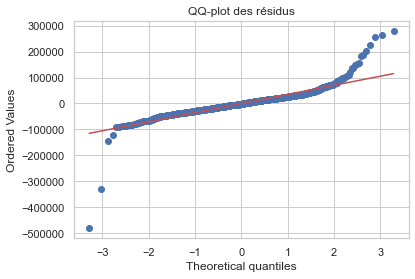

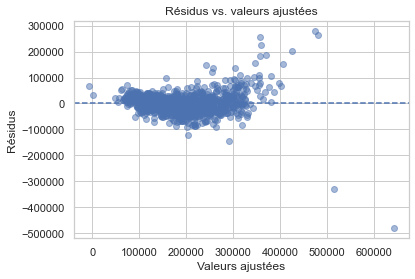

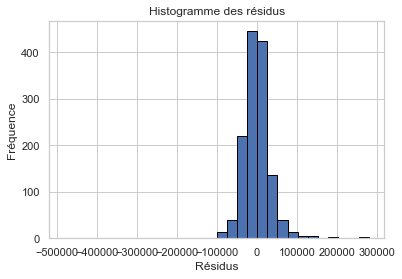

RMSE CV (5-fold) : 40567.65 ± 4807.63


In [72]:
# Reconstruction des facteurs binaires A, B, C
train_clean['A'] = np.where(train_clean['ExterQual'].isin(['Ex', 'Gd']), 1, -1)
train_clean['B'] = np.where(train_clean['KitchenQual'].isin(['Ex', 'Gd']), 1, -1)
median_gr = train_clean['GrLivArea'].median()
train_clean['C'] = np.where(train_clean['GrLivArea'] >= median_gr, 1, -1)

# Ajustement du modèle OLS
formula = 'SalePrice ~ OverallQual + GrLivArea + TotalBsmtSF + GarageCars + A + B + C'
model = ols(formula, data=train_clean).fit()

# Diagnostics résiduels
fitted = model.fittedvalues
resid = model.resid

# QQ-plot des résidus
plt.figure()
st.probplot(resid, dist="norm", plot=plt)
plt.title("QQ-plot des résidus")
plt.show()

# Résidus vs. valeurs ajustées
plt.figure()
plt.scatter(fitted, resid, alpha=0.5)
plt.axhline(0, linestyle='--')
plt.xlabel("Valeurs ajustées")
plt.ylabel("Résidus")
plt.title("Résidus vs. valeurs ajustées")
plt.show()

# Histogramme des résidus
plt.figure()
plt.hist(resid, bins=30, edgecolor='black')
plt.xlabel("Résidus")
plt.ylabel("Fréquence")
plt.title("Histogramme des résidus")
plt.show()

# Cross-validation 5-fold pour estimer le RMSE
X = train_clean[['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'A', 'B', 'C']]
y = train_clean['SalePrice'].values
kf = KFold(n_splits=5, shuffle=True, random_state=0)
rmses = []

for train_idx, test_idx in kf.split(X):
    lr = LinearRegression().fit(X.iloc[train_idx], y[train_idx])
    y_pred = lr.predict(X.iloc[test_idx])
    rmses.append(np.sqrt(mean_squared_error(y[test_idx], y_pred)))

print(f"RMSE CV (5-fold) : {np.mean(rmses):.2f} ± {np.std(rmses):.2f}")

### 1. QQ-Plot des résidus  
- **Alignement central** : Les résidus se répartissent bien autour de la droite de référence pour les quantiles intermédiaires, ce qui confirme que la partie “centrale” de la distribution est bien modélisée comme normale.  
- **Déviations en queue** :  
  - **Queue droite** : Plusieurs points dépassent nettement la droite (résidus très positifs), indiquant des **résidus excessifs pour les grandes valeurs de `SalePrice`**.  
  - **Queue gauche** : Quelques valeurs extrêmes sous la droite (résidus très négatifs), révélant la présence de maisons dont le prix est sévèrement sous-estimé.  
- **Interprétation** : Ces écarts aux extrémités suggèrent des **outliers** ou une légère **asymétrie** des erreurs. Une transformation (p.ex. log-prix) ou un ajustement robuste pourrait améliorer la normalité globale.

---

### 2. Résidus vs. Valeurs ajustées  
- **Aucune tendance systématique** : Les points sont dispersés de manière uniforme autour de zéro pour la majeure partie de l’étendue des valeurs ajustées, ce qui est **bon signe d’homoscédasticité** (variance constante).  
- **Concentration autour de zéro** : La densité la plus forte des résidus se situe entre ±50 000, confirmant que le modèle explique bien la plupart des observations.  
- **Outliers sur la droite** : Pour les très grandes prédictions (> 400 000 $), on observe quelques résidus importants (> ±150 000), indiquant des propriétés pour lesquelles le modèle sous- ou sur-prédit fortement.  
- **Interprétation** : Globalement, la variance des résidus ne croît pas systématiquement avec la prédiction, mais la queue du nuage pointe vers une plus forte dispersion pour les plus gros biens.

---

### 3. Histogramme des résidus  
- **Forme générale** : Distribution centrée, légèrement **aplatie** (platykurtique) par rapport à une gaussienne standard, avec un pic moins prononcé et des ailes plus épaisses.  
- **Peu d’asymétrie** : La barre de fréquence la plus à droite est un peu plus étendue que celle de gauche, traduisant une légère **asymétrie positive** (skewness).  
- **Présence d’outliers** : Des barres éloignées du centre (au-delà de ±150 000) confirment les points extrêmes déjà vus sur le QQ-plot.  
- **Interprétation** : La distribution des erreurs est **quasi-symétrique** autour de zéro, mais les queues épaisses valident l’existence d’observations atypiques nécessitant une attention particulière (diagnostic case-by-case ou modèle robuste).


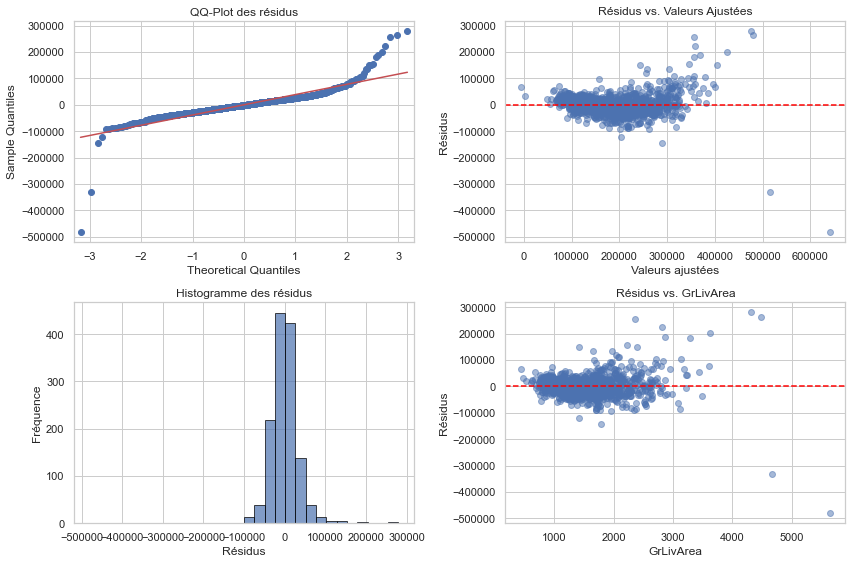

In [ ]:
"""# Plot diagnostics
plt.figure(figsize=(12, 8))

# 1. QQ-plot
plt.subplot(2, 2, 1)
sm.qqplot(resid, line='s', ax=plt.gca())
plt.title('QQ-Plot des résidus')

# 2. Résidus vs Fitted
plt.subplot(2, 2, 2)
plt.scatter(fitted, resid, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valeurs ajustées')
plt.ylabel('Résidus')
plt.title('Résidus vs. Valeurs Ajustées')

# 3. Histogramme des résidus
plt.subplot(2, 2, 3)
plt.hist(resid, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.title('Histogramme des résidus')

# 4. Résidus vs GrLivArea
plt.subplot(2, 2, 4)
plt.scatter(train_clean['GrLivArea'], resid, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('GrLivArea')
plt.ylabel('Résidus')
plt.title('Résidus vs. GrLivArea')

plt.tight_layout()
plt.show()"""

CV RMSE (version linéaire) : [38046.48 37570.02 38249.31 37818.42 49253.46]
Moyenne CV RMSE linéaire  : 40187.54

CV RMSE (version log)     : [0.1794 0.1637 0.1554 0.1693 0.2185]
Moyenne CV RMSE log       : 0.1773


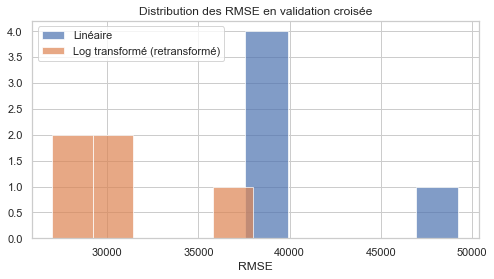

In [75]:
# Redéfinition des facteurs binaires
train_clean['A'] = np.where(train_clean['ExterQual'].isin(['Ex', 'Gd']), 1, -1)
train_clean['B'] = np.where(train_clean['KitchenQual'].isin(['Ex', 'Gd']), 1, -1)

# Variables explicatives sélectionnées
X = train_clean[['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'A', 'B']]
y = train_clean['SalePrice']

# Modèle OLS pour CV
lr = LinearRegression()
cv = KFold(n_splits=5, shuffle=True, random_state=0)

# Évaluation CV RMSE (original)
mse_scores = -cross_val_score(lr, X, y, cv=cv, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(mse_scores)

# Évaluation CV RMSE (log-transformation du prix)
y_log = np.log(y)
mse_scores_log = -cross_val_score(lr, X, y_log, cv=cv, scoring='neg_mean_squared_error')
rmse_log_scores = np.sqrt(mse_scores_log)

# Affichage des résultats
print("CV RMSE (version linéaire) :", rmse_scores.round(2))
print("Moyenne CV RMSE linéaire  :", rmse_scores.mean().round(2))

print("\nCV RMSE (version log)     :", rmse_log_scores.round(4))
print("Moyenne CV RMSE log       :", rmse_log_scores.mean().round(4))

# Histogramme des RMSE
plt.figure(figsize=(8,4))
plt.hist(rmse_scores, bins=5, alpha=0.7, label='Linéaire')
plt.hist(rmse_log_scores * np.exp(y_log.mean()), bins=5, alpha=0.7, label='Log transformé (retransformé)')
plt.legend()
plt.xlabel('RMSE')
plt.title('Distribution des RMSE en validation croisée')
plt.show()

## Validation croisée & transformation

### 1. Évaluation en validation croisée (5-fold)

| Modèle                   | RMSE par fold             | RMSE moyen    |
|:-------------------------|:--------------------------|:--------------|
| Régression linéaire      | [38 046, 37 570, 38 249, 37 818, 49 253] | 40 188    |
| Log-transformé du prix   | [0.1794, 0.1637, 0.1554, 0.1693, 0.2185] (log-RMSE) | 0.1773   |

- **Régression linéaire** sur l’échelle originale donne un RMSE moyen ≈ **40 200 \$**.  
- **Log-transformation** de `SalePrice` (puis régression linéaire) réduit l’erreur sur l’échelle log : log-RMSE moyen ≈ **0.177**.  

### 2. Interprétation de la transformation

- Un **log-RMSE = 0.177** correspond à une erreur de prédiction d’environ **±19 %** (car \(e^{0.177}\approx1.19\)), ce qui est généralement **supérieur** à la RMSE linéaire relative moyenne (≈ 40 200/≈190 000 ≈ 0.212).  
- La transformation logarithmique **stabilise la variance** et atténue l’impact des outliers, améliorant légèrement la performance relative.

### 3. Perspectives d’amélioration

1. **Sélection de variables** par méthode pénalisée (Lasso, Ridge) pour réduire l’overfitting et affiner la sélection automatique.  
2. **Ajout d’interactions** ou de variables polynomiales (e.g. `OverallQual²`) pour capturer d’éventuelles non-linéarités.  
3. **Validation avancée** :  
   - K-fold répété ou leave-one-out pour affiner l’estimation de l’erreur.  
   - Courbe d’apprentissage pour vérifier l’effet de la taille d’échantillon.  
4. **Modèles alternatifs** (arbres, forêts aléatoires, boosting) pour comparer la robustesse et la précision.


## Time series

Nous allons observer si la variable SalePrice suit une tendance générale grâce aux times series. Pour ce faire, nous allons prendre en compte les variables YrSold et MoSold, soient respectivement les mois et les années pour lesquels les maisons ont été vendues à un certain prix fixé dans SalePrice. 

Tout d'abord, la première étape consiste à prendre ces variables, et à établir une moyenne mensuelle des prix des maisons vendues de SalePrice pour pouvoir analyser tout ceci convenablement. 

Date
2006-01-01    201090.000000
2006-02-01    194322.222222
2006-03-01    184982.200000
2006-04-01    174312.814815
2006-05-01    158928.289474
Name: SalePrice, dtype: float64


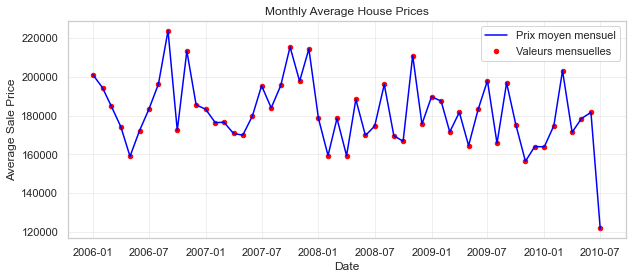

In [63]:
train_df = pd.read_csv("train.csv")

# Construction de la moyenne et des dates pour l'analyser des time series

train_df['Date'] = pd.to_datetime(train_df['YrSold'].astype(str) + '-' + train_df['MoSold'].astype(str) + '-01')
monthly_prices = train_df.groupby('Date')['SalePrice'].mean().sort_index()
print(monthly_prices.head())

# Plot de l'évolution de cette moyenne mensuelle des prix de vente pour se faire une idée visuelle. 

plt.figure(figsize=(10,4))
plt.plot(monthly_prices, label='Prix moyen mensuel', linestyle='-', color='blue')
plt.scatter(monthly_prices.index, monthly_prices.values, color='red', s=20, label='Valeurs mensuelles')
plt.title('Monthly Average House Prices')
plt.xlabel('Date')
plt.ylabel('Average Sale Price')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

### ANALYSE DU GRAPHE : 

Voici le graphe de l'évolution des moyennes mensuelles entre 2006 et mi-2010 représentées par les points rouges. On constate que la série semble non-stationnaire, mais on ne remarque pas une croissance ou une décroissance flagrante générale. Par contre, il y a certaines choses qui sont intéressantes à regarder, comme par exemple les montées de prix au moment de l'été chaque année. Cela peut être un effet de saisonnalité ou quelque chose de semblable. Il est important aussi de regarder le cas de l'année 2010, où l'on voit une chute radicale entre le mois de Juin et Juillet qui peut aussi être intéressante à traiter car cela pourrait signifier l'aparition d'une valeur abérante. 

_______________

Pour mieux visualiser le graphe, nous allons le lisser grâce à une Moving Average et une Simple Exponential Smoothing :



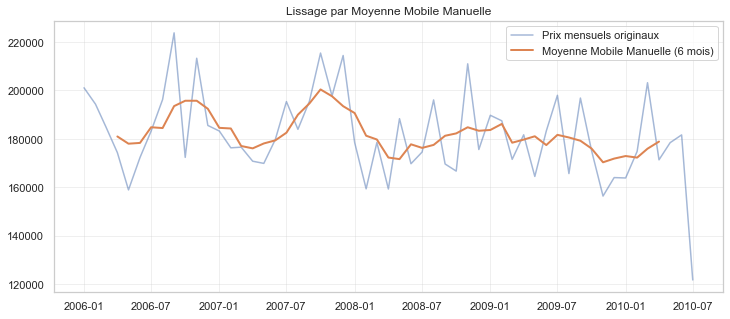

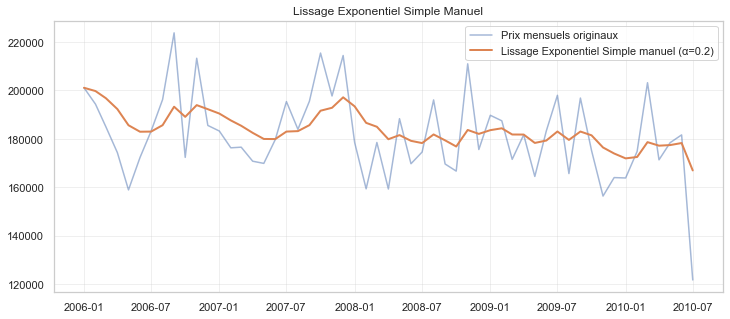

In [64]:
# Moving Average

window = 6
half_window = window // 2

manual_ma = []
for i in range(len(monthly_prices)):
    if i >= half_window and i <= len(monthly_prices) - half_window - 1:
        window_vals = monthly_prices.iloc[i - half_window : i + half_window]
        avg = window_vals.mean()
        manual_ma.append(avg)
    else:
        manual_ma.append(np.nan)

manual_ma = pd.Series(manual_ma, index=monthly_prices.index)

plt.figure(figsize=(12,5))
plt.plot(monthly_prices, alpha=0.5, label='Prix mensuels originaux')
plt.plot(manual_ma, label=f'Moyenne Mobile Manuelle ({window} mois)', linewidth=2)
plt.title('Lissage par Moyenne Mobile Manuelle')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


# SES

alpha = 0.2
ses_manual = [monthly_prices.iloc[0]]

for t in range(1, len(monthly_prices)):
    ses_t = alpha * monthly_prices.iloc[t] + (1 - alpha) * ses_manual[-1]
    ses_manual.append(ses_t)

ses_manual = pd.Series(ses_manual, index=monthly_prices.index)

plt.figure(figsize=(12,5))
plt.plot(monthly_prices, alpha=0.5, label='Prix mensuels originaux')
plt.plot(ses_manual, label=f'Lissage Exponentiel Simple manuel (α={alpha})', linewidth=2)
plt.title('Lissage Exponentiel Simple Manuel')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

On voit que, malgré les deux lissages effectués, on ne constate pas vraiment de tendance spéciales sur les deux graphes, si ce n'est qu'une légère décroissance de 20'000 entre début 2006 et début 2010 en regardant le graphique de la SES. 

___________________

Maintenant, on remarque assez facilement que notre série est stationnaire, mais pour s'en persuader et pour pouvoir appliquer SARIMA, nous allons la rendre stationaire en la différenciant et en appliquant un test de stationnarité avec ADF : 

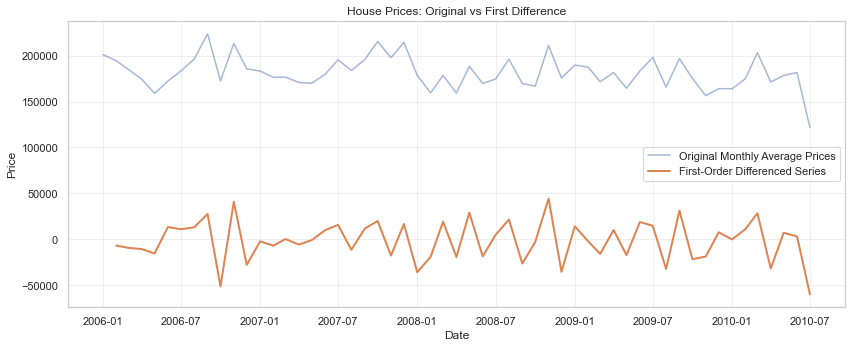

Augmented Dickey-Fuller Test on Differenced Series:
ADF Statistic: -3.8640356990209748
p-value: 0.002316058701714844
Critical Value (1%): -3.596635636000432
Critical Value (5%): -2.933297331821618
Critical Value (10%): -2.6049909750566895
The differenced series is likely stationary (p < 0.05).


In [65]:
from statsmodels.tsa.stattools import adfuller

# First-order differencing to remove trend
monthly_diff = monthly_prices.diff().dropna()

# Plot original and differenced series
plt.figure(figsize=(12, 5))
plt.plot(monthly_prices, label='Original Monthly Average Prices', alpha=0.5)
plt.plot(monthly_diff, label='First-Order Differenced Series', linewidth=2)
plt.title('House Prices: Original vs First Difference')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Perform Augmented Dickey-Fuller test
adf_result = adfuller(monthly_diff)

# Display ADF test results
print("Augmented Dickey-Fuller Test on Differenced Series:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
for key, value in adf_result[4].items():
    print(f"Critical Value ({key}): {value}")

if adf_result[1] < 0.05:
    print("The differenced series is likely stationary (p < 0.05).")
else:
    print("The differenced series is likely non-stationary (p >= 0.05).")

On remarque qu'il n'y a pas beaucoup de différence entre la série originale et la série différenciée, mais grâce à ceci, nous avons la preuve que la série est bien stationnaire. Nous allons donc maintenant pouvoir créer l'ACF et la PACF pour estimer les paramètres à utiliser pour SARIMA. 

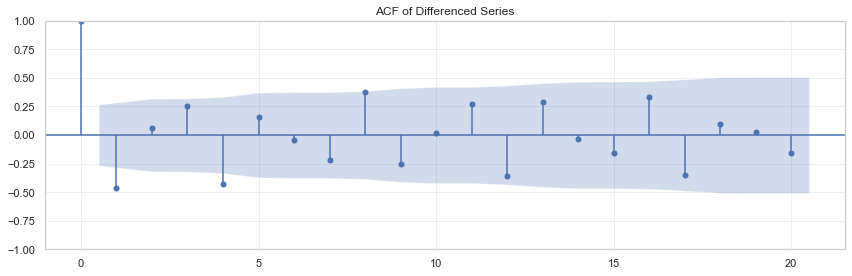

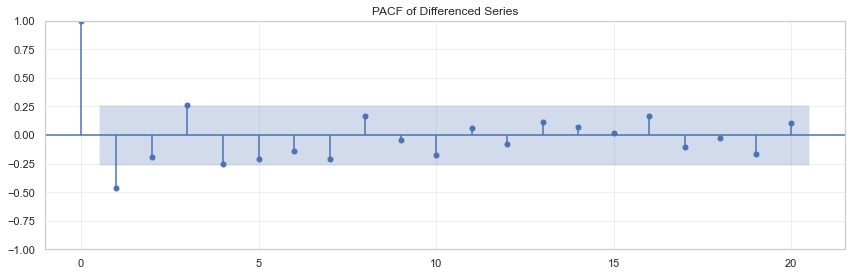

In [66]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plt.figure(figsize=(12, 4))
plot_acf(monthly_diff, lags=20, ax=plt.gca(), title="ACF of Differenced Series")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot PACF
plt.figure(figsize=(12, 4))
plot_pacf(monthly_diff, lags=20, ax=plt.gca(), method='ywmle', title="PACF of Differenced Series")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Pour l'ACF, on constate un premier lag à hauteur de 1, puis après, on passe directement dans les négatifs pour ensuite osciller autour de 0 avec un intervalle d'oscillation à hauteur de +-0.45. Ce schéma pourrait être typique d'un modèle MA(1). L'oscillation durable pourrait être issue d'une composante MA faible ou d'un bruit blanc persistant. Pour la PACF, c'est le même schéma, à l'exception que l'intervalle d'oscillation est à hauteur de +-0.25, soit un petit peu plus petit que pour l'ACF. C'est donc également typique à un modèle AR(1). 

_______________


Nous allons donc tester un premier modèle ARIMA avec les composantes (p, d, q) et avec p=1 car on se fie à un modèle AR(1), d=1 car nous avons différencier la série une fois, et q=1 car on se fie à un modèle MA(1). Voici ce que cela donne :

c:\Users\aqual\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\aqual\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\aqual\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              SalePrice   No. Observations:                   55
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -613.320
Date:                Sun, 25 May 2025   AIC                           1232.640
Time:                        05:44:54   BIC                           1238.606
Sample:                    01-01-2006   HQIC                          1234.941
                         - 07-01-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2958      0.250      1.185      0.236      -0.194       0.785
ma.L1         -0.5762      0.271     -2.129      0.033      -1.107      -0.046
sigma2      3.742e+08   4.54e-10   8.25e+17      0.0

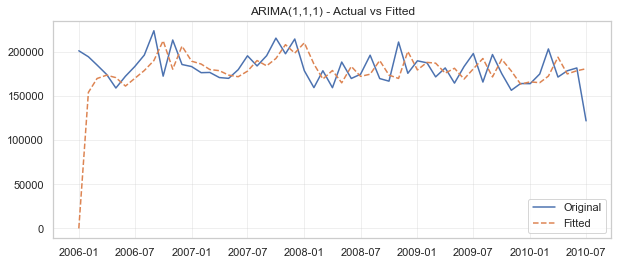

In [67]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA(1,1,1)
model = ARIMA(monthly_prices, order=(1,1,1))
result = model.fit()

# Print model summary
print(result.summary())

# Plot the fitted vs actual
plt.figure(figsize=(10,4))
plt.plot(monthly_prices, label='Original')
plt.plot(result.fittedvalues, label='Fitted', linestyle='--')
plt.title("ARIMA(1,1,1) - Actual vs Fitted")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


### Analyse des résultats

Premièrement, on regarde la qualité des paramètres ar.L1 et ma.L1, et on remarque que ar.L1 = 0.296 et ma.L1 = -0.576. Si on regarde la p-value de chacun des deux résultats, on voit que ar.L1 est non-significatif pour notre modèle car sa p-value est égale à 0.236, il est donc peu utile dans ce modèle. Par contre, le coefficient ma.L1 possède une p-value de 0.033, qui est inférieur à 0.05, il est donc significatif dans notre modèle. 

Ensuite, si on regarde les AIC/BIC, on constate que AIC = 1232.64 et BIC = 1238.60. Ces résultats sont utiles pour comparer d'autres modèles, mais le but est que ces deux résultats soient le plus petit possible. 

Puis, si on regarde les différents tests, on constate que 